In [95]:
openai_api_key = 'YOUR_API_KEY'
model_name = 'gpt-4o-mini' 

In [96]:
import openai
import copy
import numpy as np
import os

import ast
import astunparse
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import TerminalFormatter
import heapq
import base64


import localization 
from localization import build_msg_localizer
from QA_agent import MultiviewSceneGraph, setup_LMP, cfg_tabletop

video_id = "41069042"
msg_file_path = "YOUR_MSG_FILE_PATH"
predicted_msg_file = msg_file_path + "/" + video_id + "/refine_topo_gt.json"
localizer = build_msg_localizer(
    msg_path = predicted_msg_file,
    video_id = video_id,
    experiment_mode="localize",
    device = 0,
    split = "mini-val",
)

os.environ["OPENAI_API_KEY"] = openai_api_key
client = openai.OpenAI()

box_matcher No param
obj_embedder frozen
place_embedder frozen


In [111]:
env = MultiviewSceneGraph()
lmp_tabletop_ui = setup_LMP(env, cfg_tabletop)

#Example questions for the agent to answer
#question = "How many frames are there."
#question = "what kind of objects are there in the frame number 3044.722 and also give me the quantities"
#question = "show me where are the tables."
#question = "Where can I put my laptop."
#question = "I am tired where can I go to sleep"
question = "I’m in place 'start', how can I go to 'goal'?"
##question = "what do we have in this space"
#question = "are the tables in frame 3044.239 and frame 3105.730 the same?"
#question = "are the tables in frame 3044.239 and frame 3044.722 the same?"
#question = "does the table in frame number: 3044.239 appear in other frames?"
#question = "does the tv in frame number: 3127.721 appear in other frames?"
#question = "is there any book in this space?"
#question = "How many tv are there."
#question = "What's the color of the cabinet in picture 3123.722?"
#question = "What's the shape of the table in picture 3044.239?"

user_input = question #@param {allow-input: true, type:"string"}

LMP tabletop_ui exec:

# I’m in place 'start', how can I go to 'goal'?.
start_frame = get_img2frame("start")
goal_frame = get_img2frame("goal")
start_node = get_frame2index(start_frame)
goal_node = get_frame2index(goal_frame)
path = shortest_path(start_node, goal_node)
frame_path = [get_index2frame(i) for i in path]
say(f'Your path is {frame_path}')
show_images_from_frames(frame_path)


robot says: Your path is ['3050.736', '3044.239', '3052.235', '3053.735', '3098.233', '3102.731', '3104.230', '3115.726']


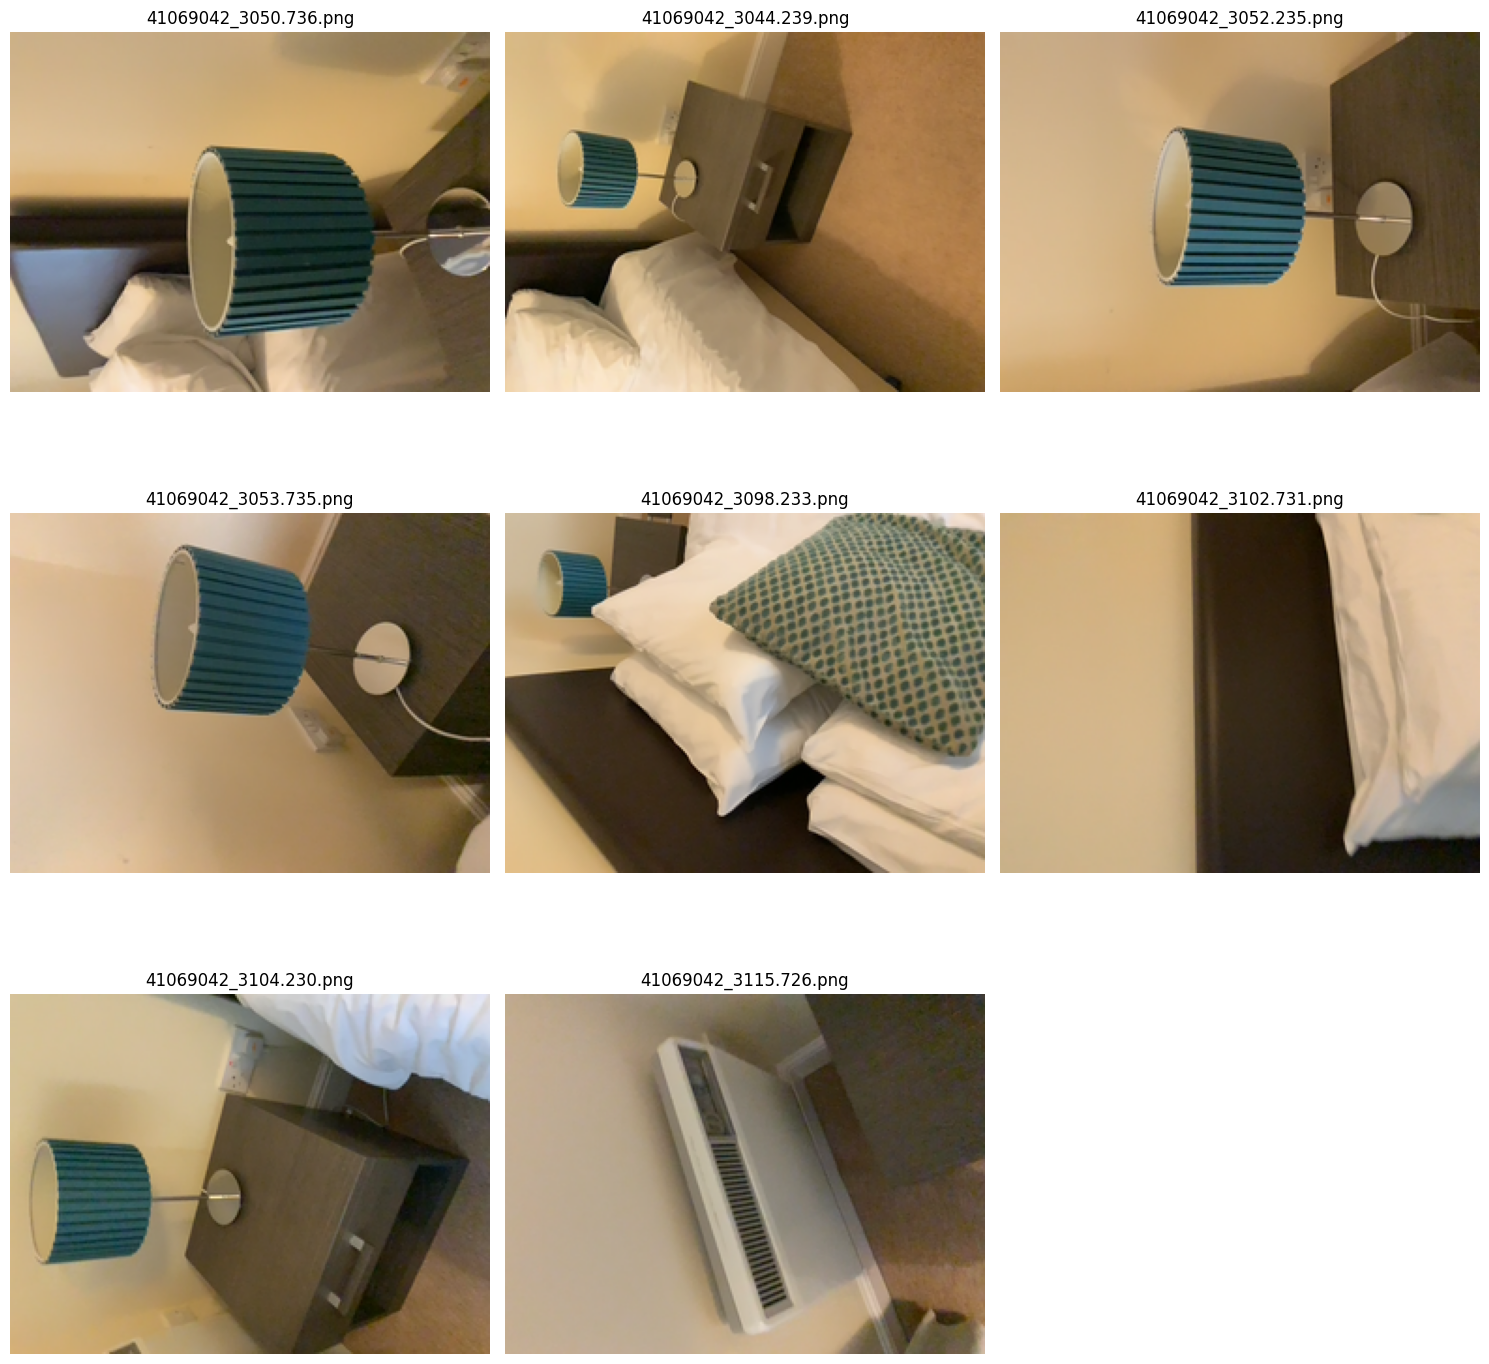

In [112]:
lmp_tabletop_ui(user_input, f'')

QA_agent log
1. "Added object comparison for specific video frames"
2. "Added command to check whether object appearance in specific frames"
3. "Added `issimilar` function for fuzzy object name matching"
4. "Added VLM access."
5. "Added localization function."